<a href="https://colab.research.google.com/github/afiflh/PCVK_Genap_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Tugas Praktikum**

1. Buat Gamma Correction sesuai dengan petunjuk berikut

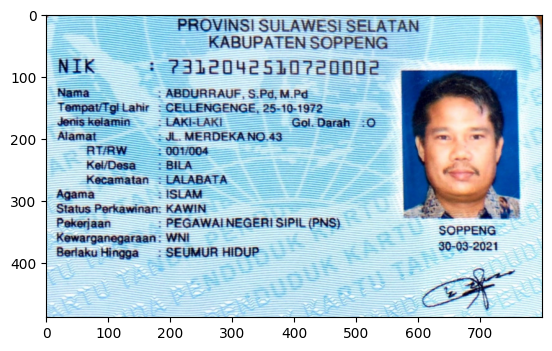

In [12]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
#import math
from math import log10, sqrt, pow
import os
import glob

img = cv.imread('/content/drive/MyDrive/PCVK/KTP_Modul1.jpeg')
img_color = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img_color)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


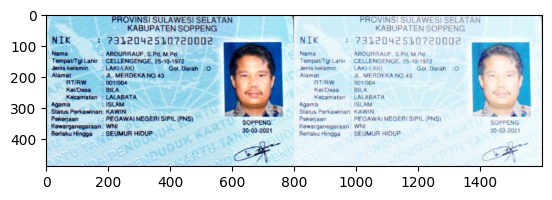

In [16]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
    gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/KTP_Modul1.jpeg')
img_color = cv.cvtColor(original,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(img_color.shape, img_color.dtype)

#akses per piksel
for y in range(img_color.shape[0]):
    for x in range(img_color.shape[1]):
        for c in range(img_color.shape[2]):
            gamma_image[y,x,c] = np.clip(255 * pow(img_color[y,x,c]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((img_color, gamma_image))
plt.imshow(final_frame)

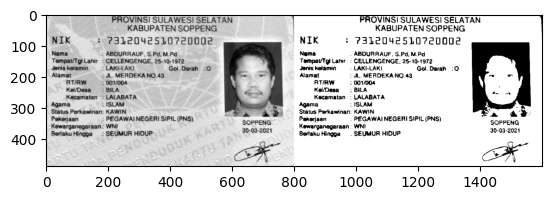

In [17]:
bit_depth=1
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/KTP_Modul1.jpeg', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(round(original[y,x]/level) * level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
plt.imshow(final_frame, cmap='gray')

nilai psnr-nya adalah:  19.837947650941782  dB


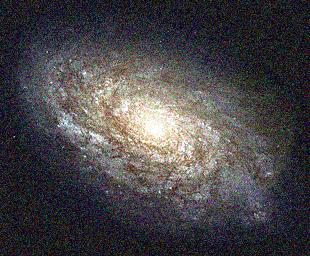

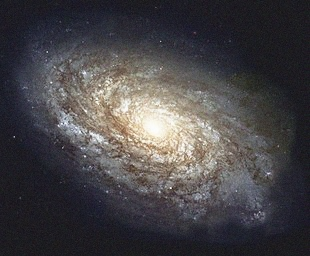

In [ ]:
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

img_asli = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n= cv.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlahGambar = 20
for i in range(jumlahGambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlahGambar)

psnr = PSNR(img_asli,denoised_image)

print('nilai psnr-nya adalah: ',psnr,' dB')
cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)

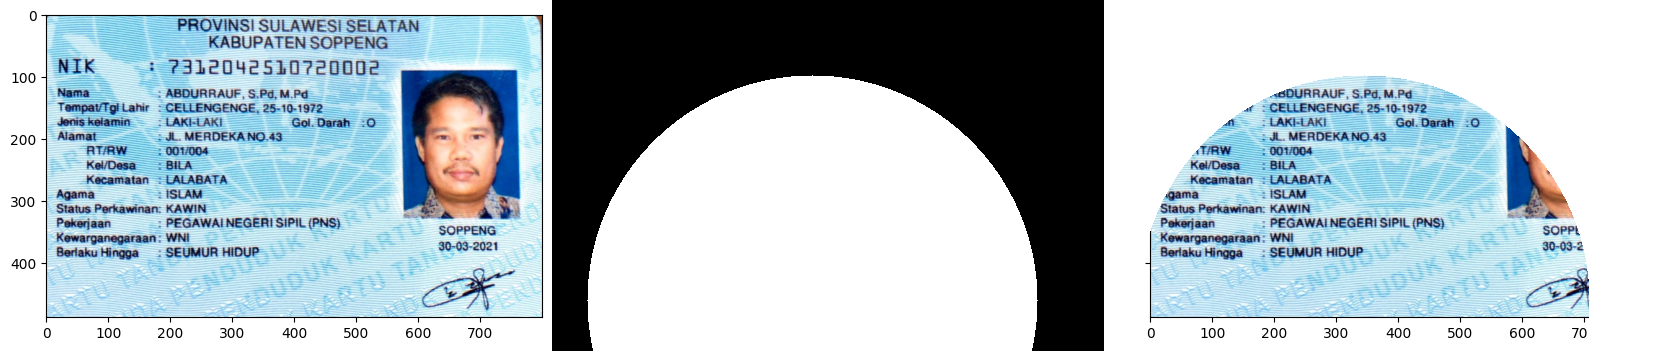

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/ktp1.png')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

result = img & mask
# fungsi dari opencv berikut juga bisa digunakan
# result = cv.bitwise_and(image, mask)
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

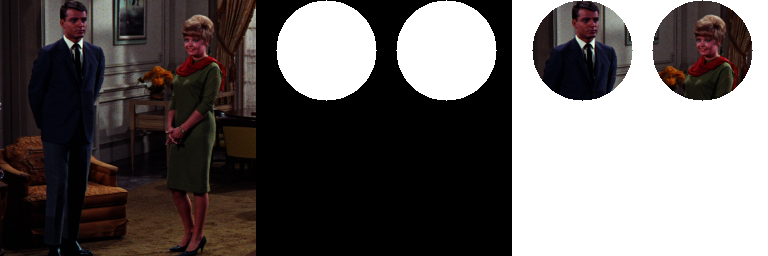

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = img & mask & mask2
# fungsi dari opencv berikut juga bisa digunakan
# result = cv.bitwise_and(image, mask)
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

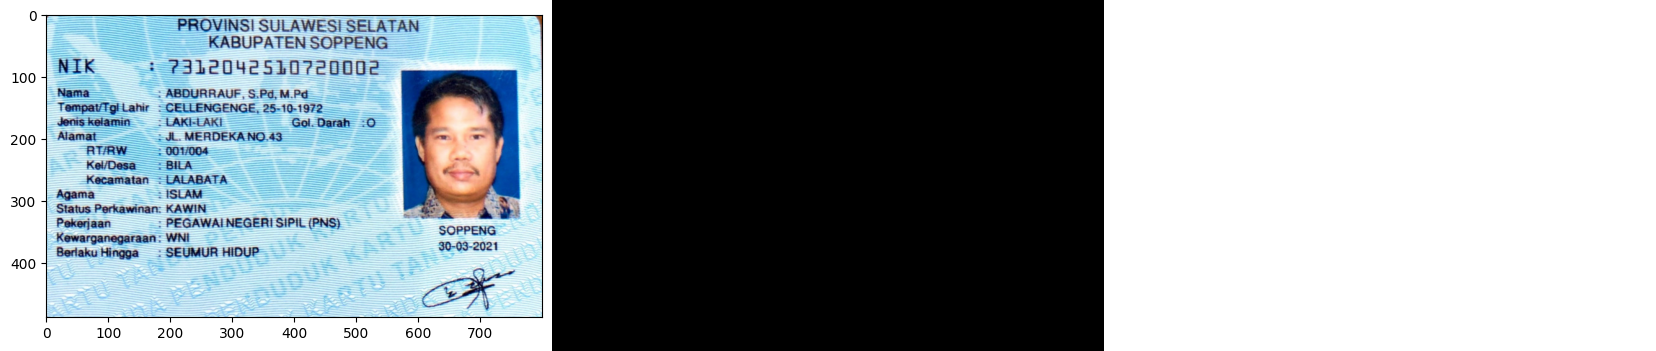

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
#import math
from math import log10, sqrt, pow
import os
import glob

#img = cv.imread('/content/drive/MyDrive/images/mandrill.tiff')
img = cv.imread('/content/drive/MyDrive/PCVK/Images/ktp1.png')
# img_color = cv.cvtColor(img,cv.COLOR_BGR2RGB)
# plt.imshow(img_color)

# Face
# mask = np.zeros(img.shape, dtype=np.uint8)
# mask = cv.circle(mask, (670, 200), 100, (255,255,255), -1)

# nose
 # mask = np.zeros(img.shape, dtype=np.uint8)
 # mask = cv.circle(mask, (670, 220), 25, (255,255,255), -1)

# mount
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (670, 250), 25, (255,255,255), -1)

# plt.imshow(mask)

result = img & mask
# fungsi dari opencv berikut juga bisa digunakan
# result = cv.bitwise_and(img, mask)
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

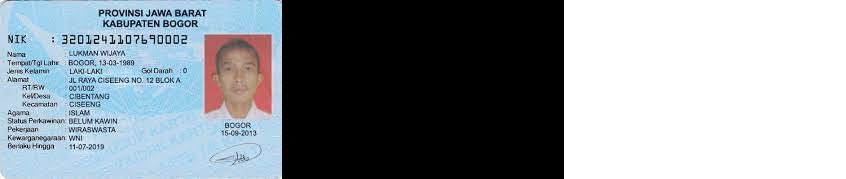

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/ktp.jpg')
# Eye
# mask = np.zeros(img.shape, dtype=np.uint8)
# mask = cv.circle(mask, (700, 200), 20, (255,255,255), -1)

# mask2 = np.zeros(img.shape, dtype=np.uint8)
# mask2 = cv.circle(mask, (650, 200), 20, (255,255,255), -1)

# Ear
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (730, 220), 30, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (600, 210), 30, (255,255,255), -1)

result = img & mask & mask2
# fungsi dari opencv berikut juga bisa digunakan
# result = cv.bitwise_and(image, mask)
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)